Customer ID – порядковый номер строки в таблице
Age – возраст покупателя
Gender – пол покупателя
Item Purchased – приобретенный товар
Category - категория
Purchase Amount (USD) – сумма покупки (в долларах)
Location – локация покупки
Size – размер (одежды)
Color – цвет
Season – время года совершения покупки
Review Rating – полученный в отзыве рейтинг
Subscription Status – статус подписки покупателя
Shipping Type – тип доставки
Discount Applied – применена ли скидка
Promo Code Used – применен ли промокод
Previous Purchases – были ли у данного покупателя предыдущие покупки
Payment Method – способ оплаты
Frequency of Purchases – частота покупок.

In [195]:
# Загрузим все необходимые библиотеки
import os
import numpy as np
import pandas as pd

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Без этой магической команды графики не отобразятся в ячейке Блокнота
%matplotlib inline
import matplotlib.pyplot as plt # Библиотека для построения графиков
import seaborn as sns # Еще одна библиотека для построения графиков, работает как обертка над предыдущей


In [196]:
df = pd.read_csv(r'C:\Users\user\Desktop\shopping_habits.csv' )


In [197]:
#просмотр общей инфы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [198]:
#проверка на наличие пропущенных данных
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [199]:
# Основные статистические показатели
df.describe()



,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [200]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


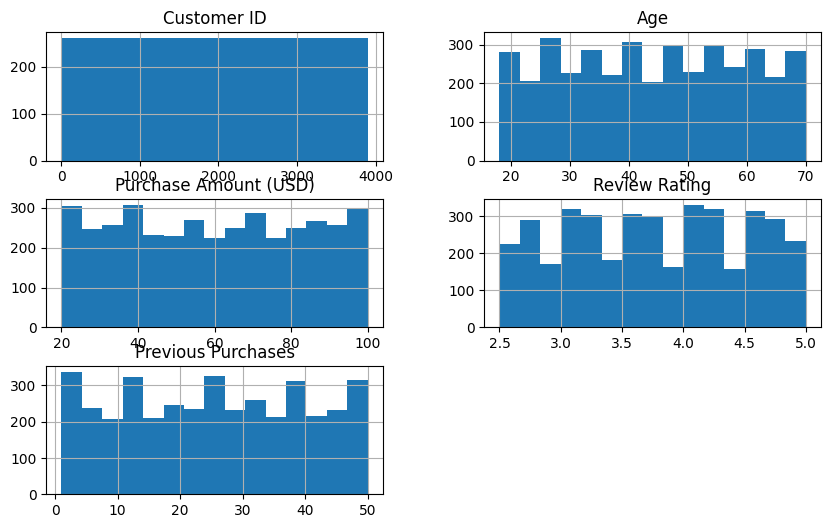

In [201]:
# Гистограмма 
df.hist(bins=15, figsize=(10, 6))
plt.show()

In [202]:
a = ['Age', "Purchase Amount (USD)", "Review Rating",  "Previous Purchases"]

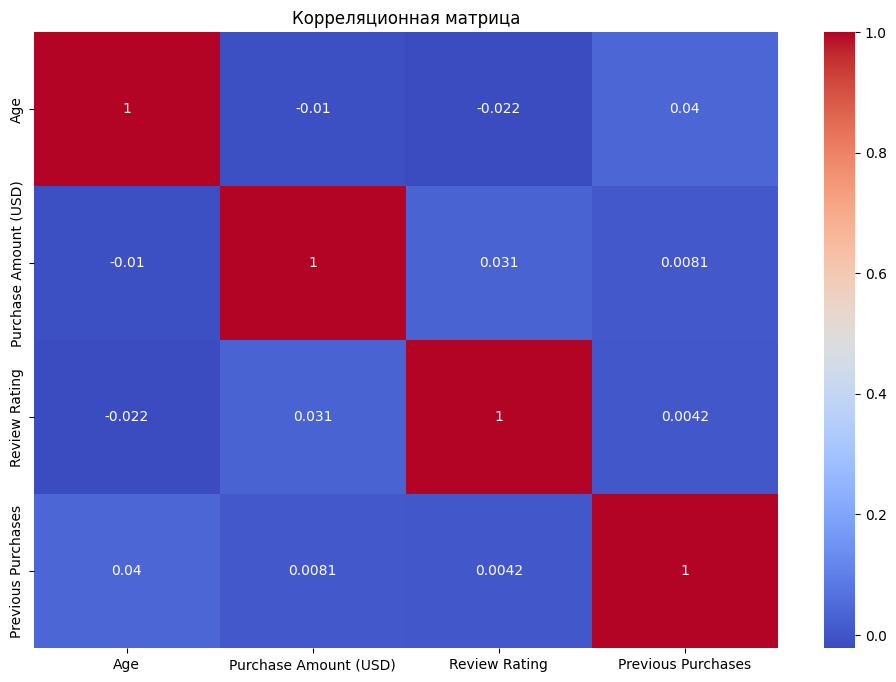

In [203]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(df[a].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

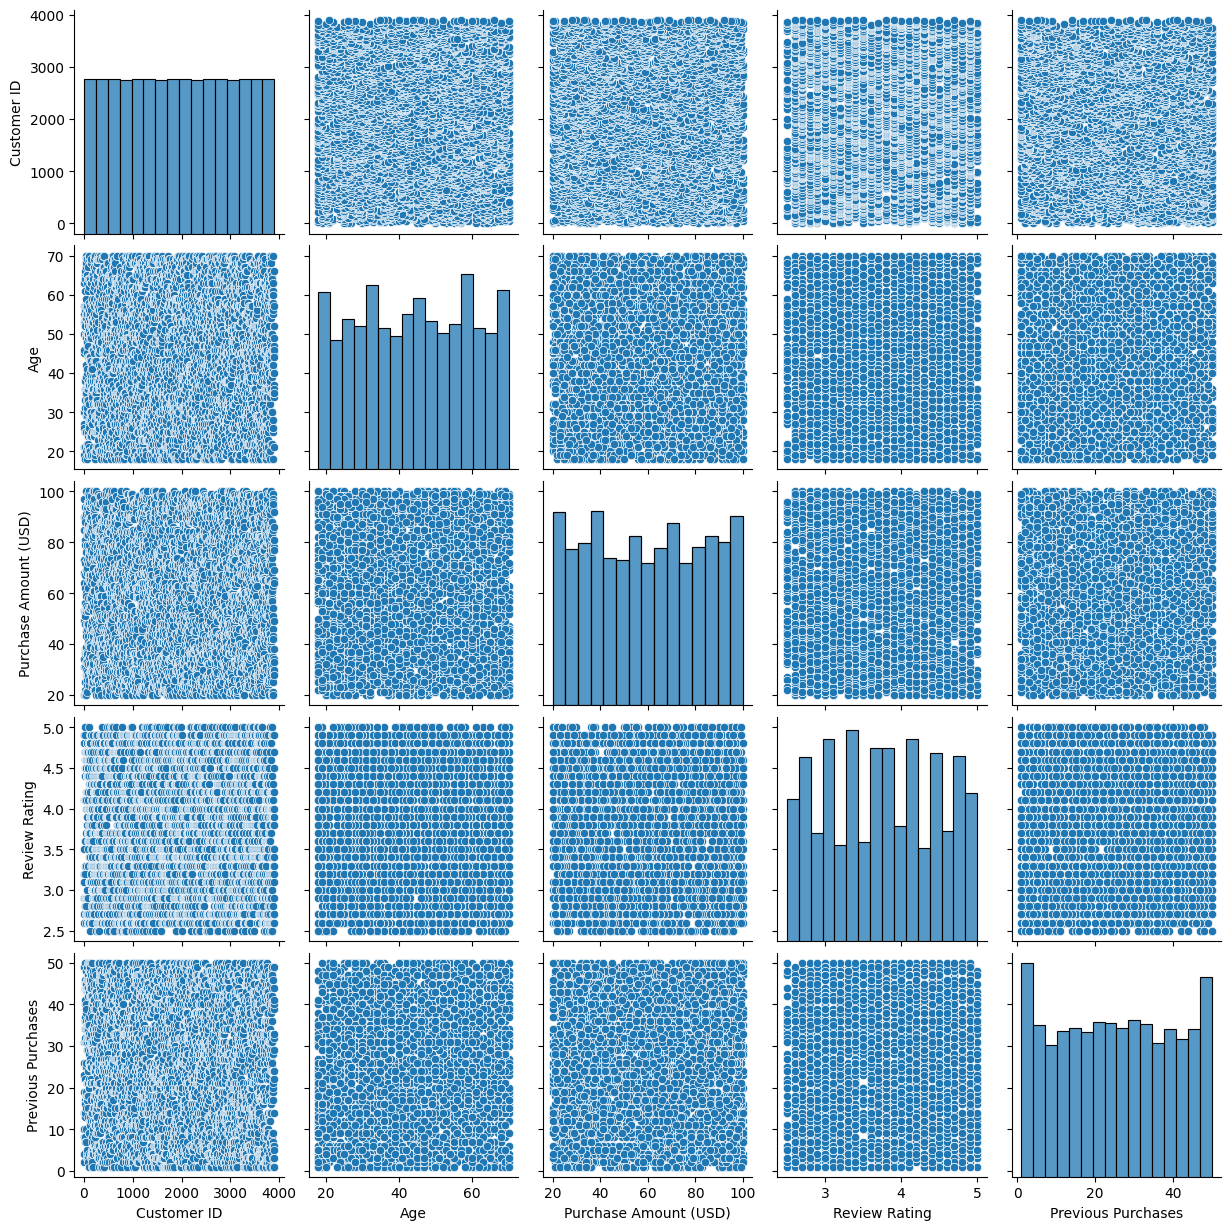

In [204]:
sns.pairplot(df)
plt.show()

In [205]:
# Группировка данных по локациям
#location_df = df.groupby('Location')#.sum().sort_values('Customer ID', ascending=False)
#location_df.head()

In [206]:
df[['Age','Gender','Item Purchased','Category','Purchase Amount (USD)','Location']].sort_values('Location', ascending=True).head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location
3453,31,Female,Shirt,Clothing,60,Alabama
2126,63,Male,Shoes,Footwear,38,Alabama
2952,50,Female,Belt,Accessories,24,Alabama
2637,20,Male,Pants,Clothing,23,Alabama
1466,58,Male,Shorts,Clothing,71,Alabama


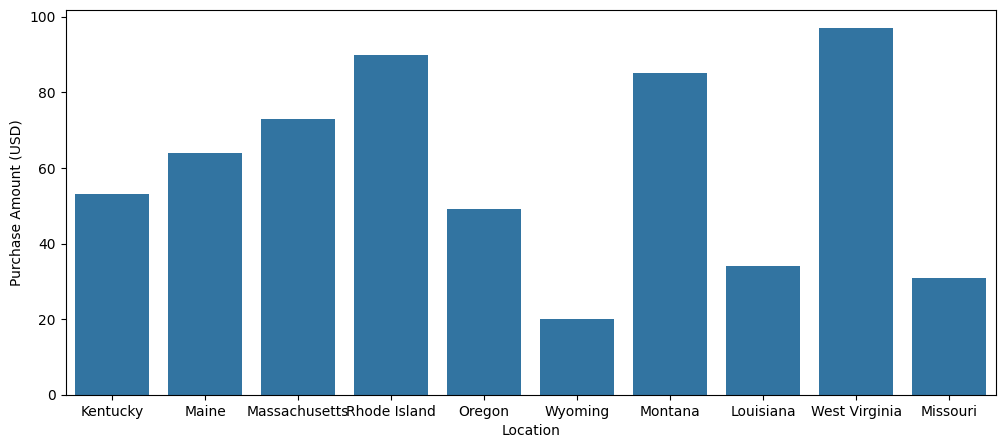

In [207]:
plt.figure(figsize=(12,5)) # Задаем в дюймах область рисования графика (ширина, высота)
sns.barplot(x='Location', y='Purchase Amount (USD)', data=df.iloc[0:10]) # рисуем столбчатый график (категория - значение)
plt.show()

In [208]:
# Поиск аномалий с использованием IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для аномалий
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация аномалий
anomalies = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(anomalies)


Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


In [209]:
print(df['Gender'].value_counts())
print(df['Category'].value_counts())
print(df['Location'].value_counts())

Gender
Male      2652
Female    1248
Name: count, dtype: int64
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts  

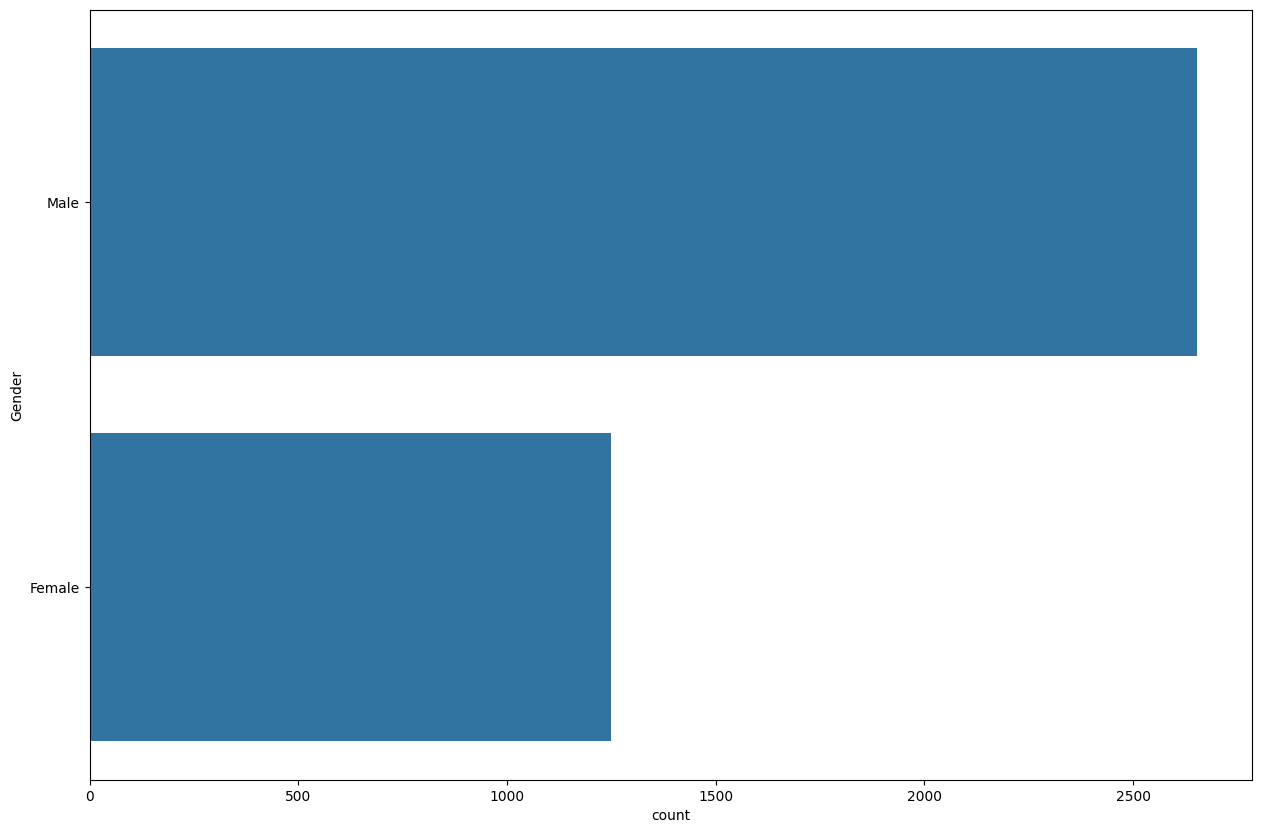

In [210]:
# Столбчатые диаграммы для категориальных данных
plt.figure(figsize=(15, 10))
sns.countplot(y='Gender', data=df)
plt.show()


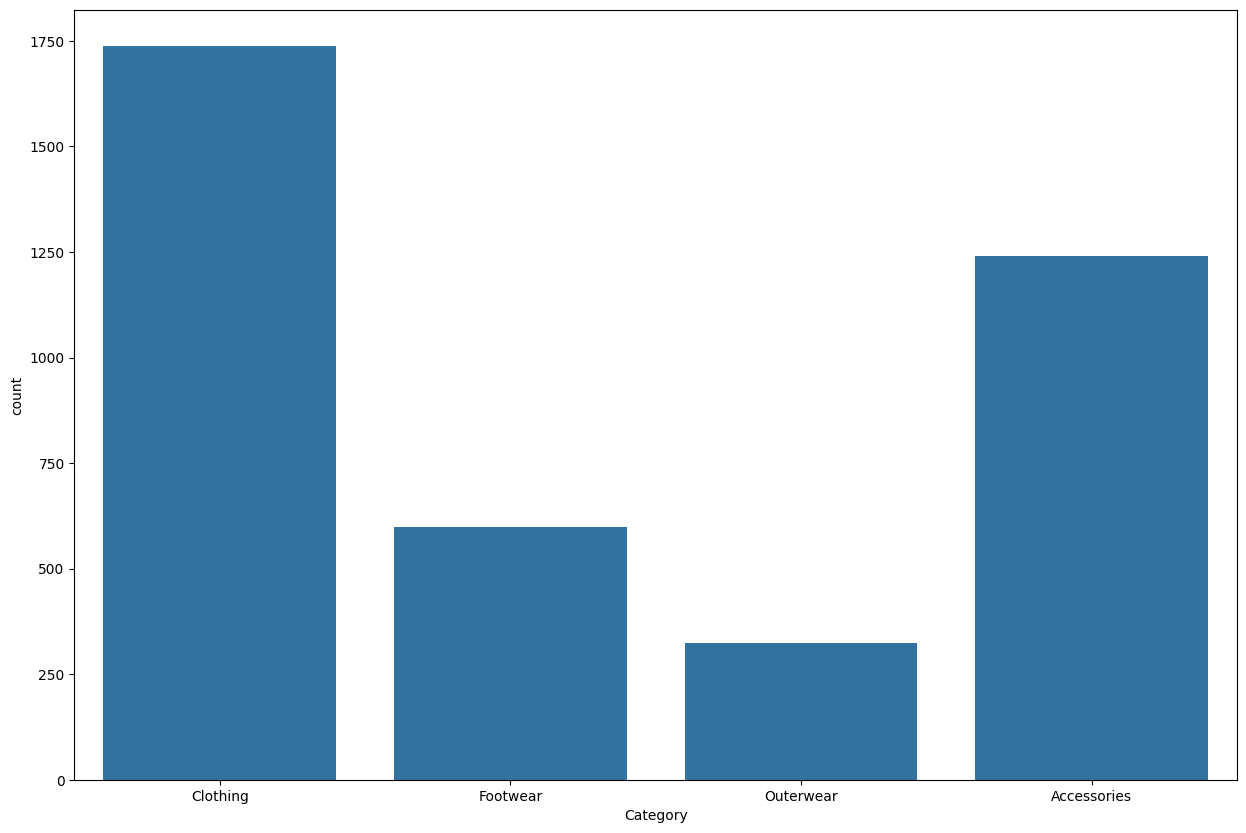

In [211]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Category', data=df)
plt.show()

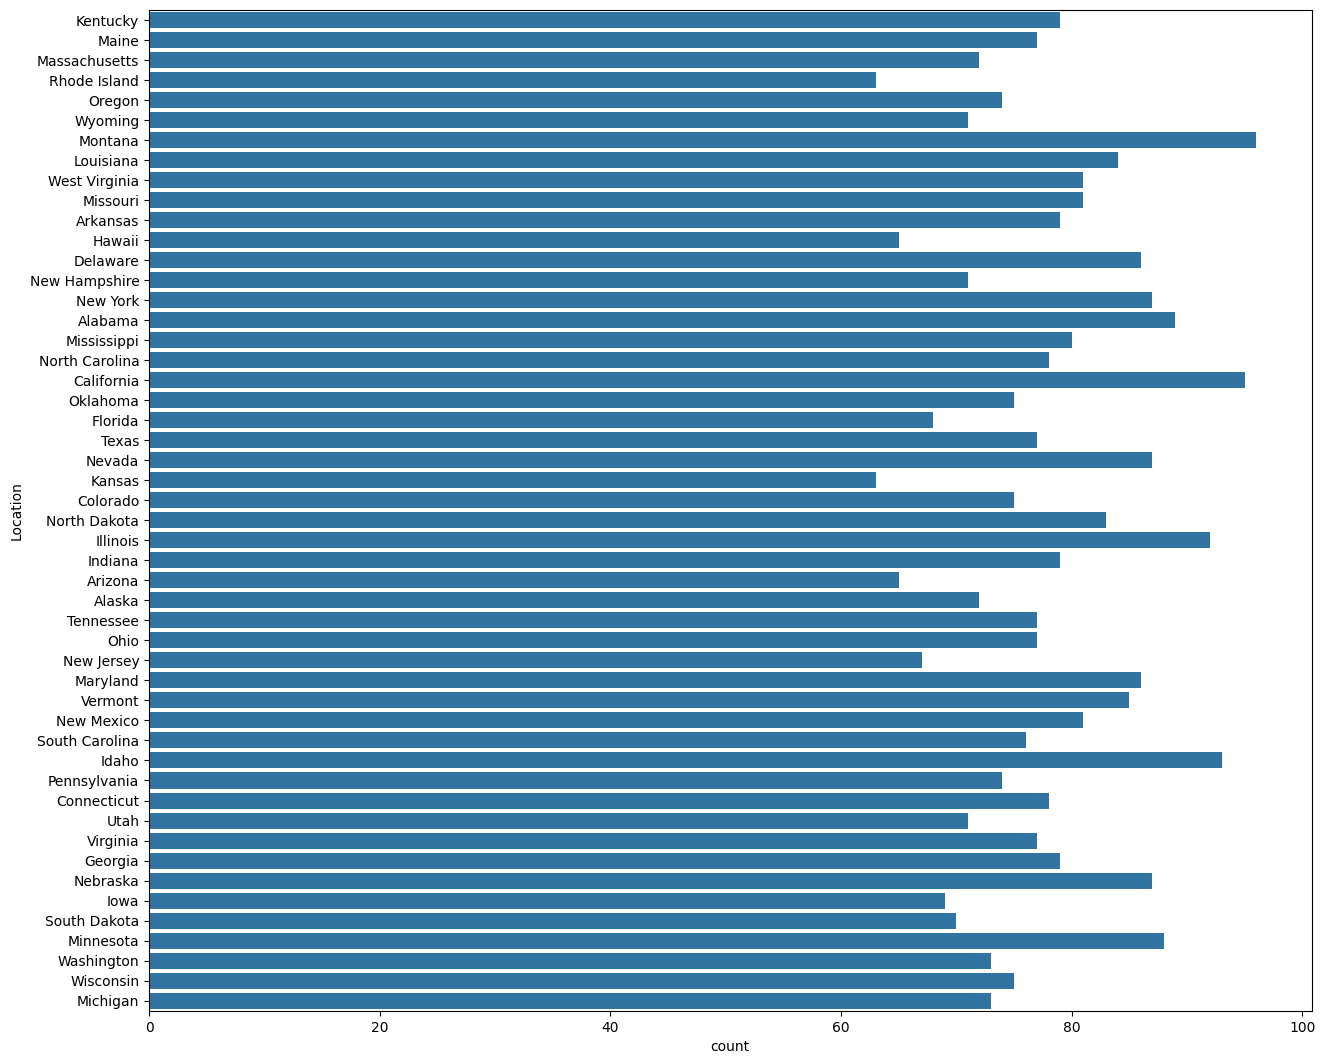

In [212]:
plt.figure(figsize=(15, 13))
sns.countplot(y='Location', data=df)
plt.show()

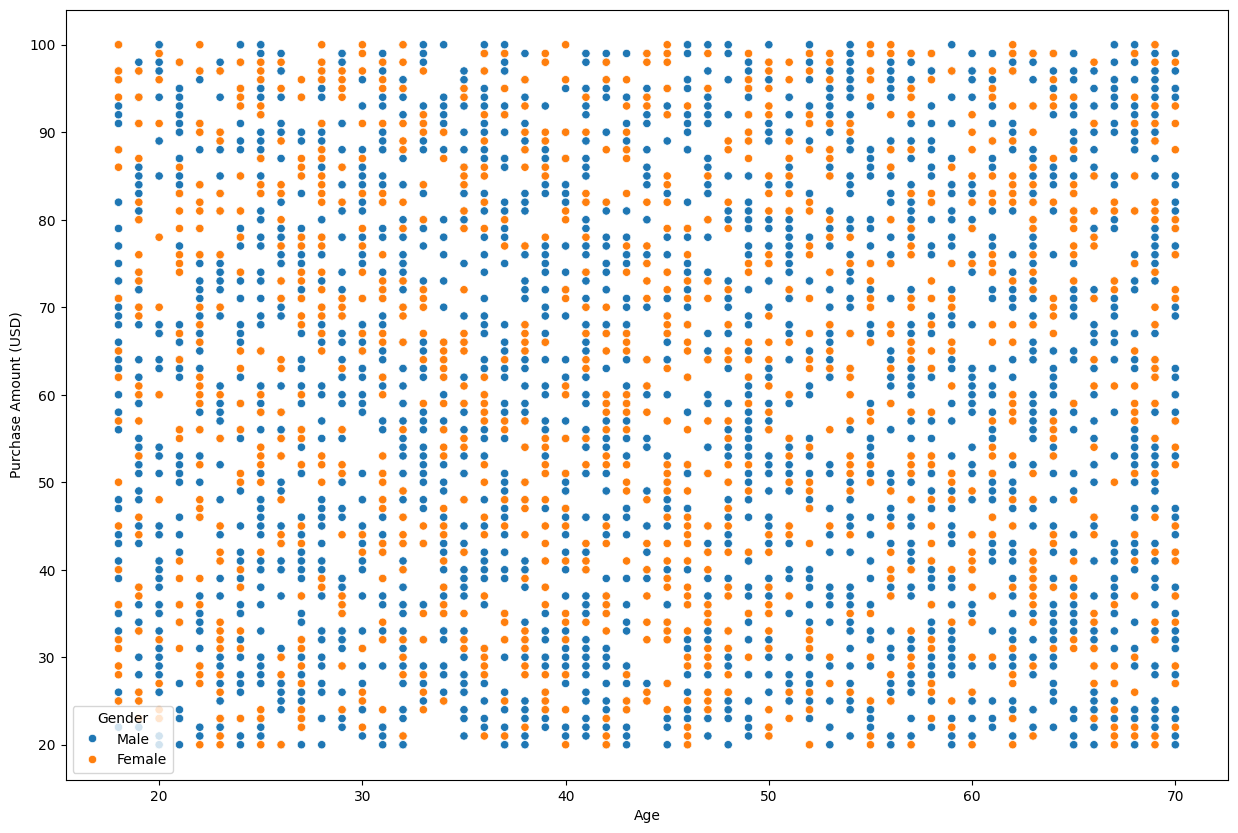

In [213]:
# Диаграммы рассеяния для изучения взаимосвязей
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=df)
plt.show()

In [214]:
df = df[['Age', "Purchase Amount (USD)", "Review Rating",  
         "Previous Purchases"]]
df.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31


In [215]:
for var in ['Age', "Purchase Amount (USD)", "Review Rating",  
            "Previous Purchases"]:
    df[var] = df[var].apply(lambda w:np.log(w+1))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Purchase Amount (USD)'}>],
       [<Axes: title={'center': 'Review Rating'}>,
        <Axes: title={'center': 'Previous Purchases'}>]], dtype=object)

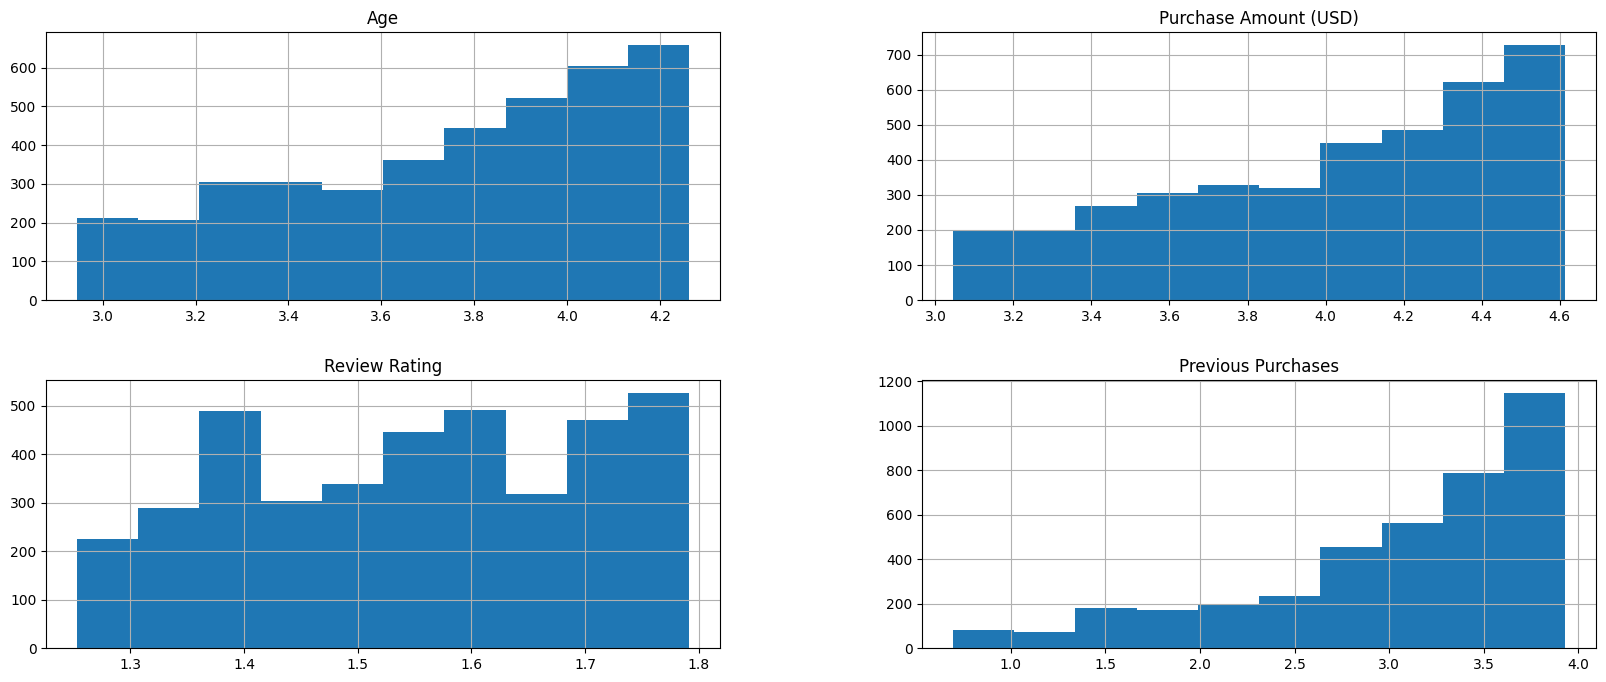

In [216]:
df.hist(figsize=(20,8))

In [231]:
def outlier_std (data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()

    up= mean + threshold * std
    low = mean - threshold * std

    anomalies = pd.concat([data[col] > up, data[col] < low], axis=1).any(axis=1)
    return anomalies, up,low

In [232]:
a,l,r =outlier_std(df,df.columns)
l

Age                      4.855544
Purchase Amount (USD)    5.339614
Review Rating            2.006269
Previous Purchases       5.409766
dtype: float64

In [233]:
def get_column_outliers(data, function=outlier_std, threshold = 3):
    outliers = pd.Series(data=[False]*len(data), index=data.index, name='is_outlier')

    comparison_table = {}

    for column in data.columns:
        anomalies, up, low = function(data, column, threshold = threshold)
        comparison_table[column] = [up, low, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers.loc[anomalies[anomalies].index] = True

    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns = ['up', 'low', 'anomalies_count', 'anomalies_percentage']
    return comparison_table, outliers

In [246]:
def anomalies_report (outliers):
    print('Total number of outliers: {}\nPercentage of outliers: {:.2f}%'.format(
            sum (outliers), 100*sum(outliers)/len(outliers)))

In [240]:

def outlider_iqr(data, col, threshold=3):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

    up = data[col].quantile(0.75) + (IQR * threshold)
    low = data[col].quantile(0.25) - (IQR * threshold)

    anomalies = pd.concat([data[col]>up, data[col]<low],axis=1).any(axis=1)
    return anomalies, up, low

In [247]:
comarison_table, iqr_outliers = get_column_outliers(df, function=outlider_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 0
Percentage of outliers: 0.00%


In [248]:
comarison_table

,up,low,anomalies_count,anomalies_percentage
Age,5.844564,1.681615,0.0,0.0
Purchase Amount (USD),6.560239,1.535360,0.0,0.0
Review Rating,2.512635,0.584751,0.0,0.0
Previous Purchases,6.737075,-0.434456,0.0,0.0


c:\Users\user\anaconda3\envs\tensorflowenv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

The markers list has more values (2) than needed (1), which may not be intended.

c:\Users\user\anaconda3\envs\tensorflowenv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

The markers list has more values (2) than needed (1), which may not be intended.

c:\Users\user\anaconda3\envs\tensorflowenv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

The markers list has more values (2) than needed (1), which may not be intended.

c:\Users\user\anaconda3\envs\tensorflowenv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

The markers list has more values (2) than needed (1), which may not be intended.

c:\Users\user\anaconda3\envs\tensorflowenv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

The markers list has more values (2) than needed (1), which may not be intended.

c:\Users\user\anaconda3\envs\tensorflowenv\lib\site-packages\seaborn\axisgrid.py:1615

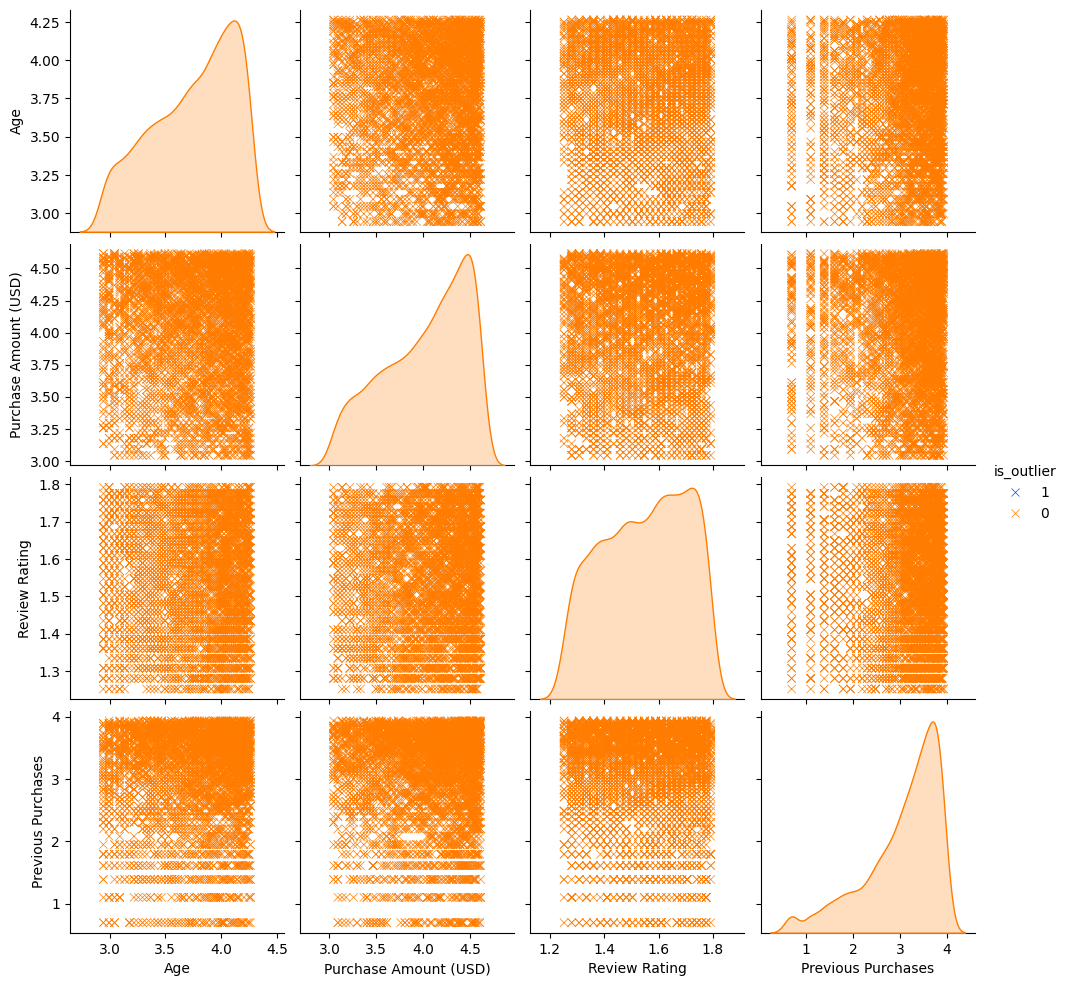

In [249]:
labeled_df = df.copy()
labeled_df['is_outlier'] = iqr_outliers

sns.pairplot(data=labeled_df, vars= df.columns,
             hue='is_outlier', hue_order=[1,0],
             markers=['x', 'o'], palette='bright')